# World's Best Cities for People and the Planet

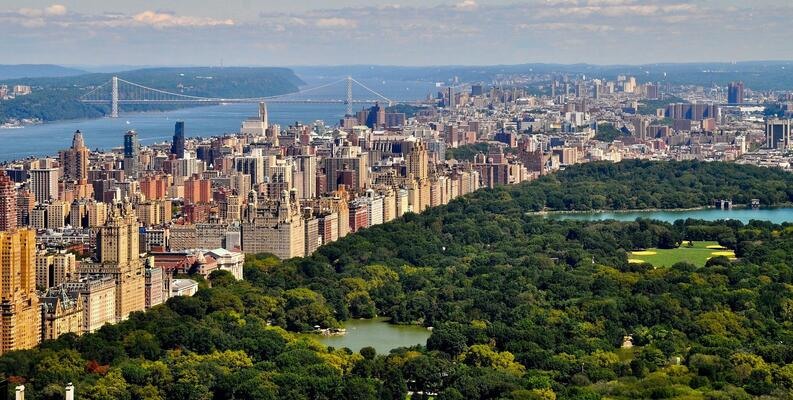

## Introduction :

This dataset contains the index, from global design firm Arcadis and the Centre for Economics and Business Research, ranks cities’ success based on social, environmental, and economic factors.

Arcadis used 32 indicators and a cross section of the world’s urban areas, so not all capitals or large cities are necessarily represented. A city is scored on each of the three sustainability factors; its overall score is the average of those.

- So basically our AIM is to analyze the various continents of various countries of various cities, there overall range/rank as compared to the another, making us realize which city/cities are best for planet and people.

#### Dataset Dictionary:
- city--- Name of city

- People--- (Social Health of city) Rates health, education, income inequality, work-life balance, ratio of wage earners to dependents, crime, housing, and living costs

- Planet--- (Environmental health of city) Energy consumption and renewable energy share, waste management, green space, sanitation, water, greenhouse gas emissions, natural catastrophe risk, and air pollution

- Profit--- (Economic Health of City) Transport infrastructure, ease of doing business, tourism, GDP per capita, the city’s importance in global economic networks, Internet connectivity, and employment rates

- Overall--- Overall ranking of the city

- Country--- Country in which city is located

- Continent--- Continent in which city is located


We are going to perform only the Exploratory Data Analysis.Where we will check how one feature is related to others, for example:
- The correlation of all numerical variables,also Statistical measures between them. Following with the distribution of continents ,and countries, with also the pair plot relation, and then looking forward with the overall ranked of cities of one particular country(we mentioned -India), and later on creating a general function to see the top 5 cities of each country.


### Importing Dependencies :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset :

In [2]:
df = pd.read_csv('GreenCities-Data.csv')

In [3]:
df.head()

,city,People,Planet,Profit,Overall,Country,Continent
0,Zurich,27,1,5,1,Switzerland,Europe
1,Singapore,48,12,1,2,Singapore,Asia
2,Stockholm,14,2,10,3,Sweden,Europe
3,Vienna,4,4,14,4,Austria,Europe
4,London,37,9,3,5,U.K.,Europe


#### Data Preprocessing and Analysis :

In [4]:
df.shape

(100, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       100 non-null    object
 1   People     100 non-null    int64 
 2   Planet     100 non-null    int64 
 3   Profit     100 non-null    int64 
 4   Overall    100 non-null    int64 
 5   Country    100 non-null    object
 6   Continent  100 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
People,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
Planet,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
Profit,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
Overall,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0


In [7]:
# Lets check the correlation.
df.corr()

,People,Planet,Profit,Overall
People,1.000000,0.558260,0.510843,0.754827
Planet,0.558260,1.000000,0.547483,0.853165
Profit,0.510843,0.547483,1.000000,0.851161
Overall,0.754827,0.853165,0.851161,1.000000


<AxesSubplot:>

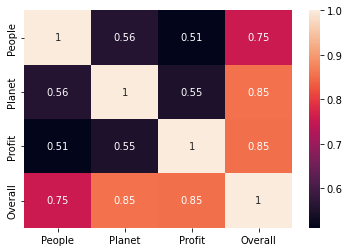

In [8]:
# Lets plot the correlation:
sns.heatmap(df.corr(),annot = True,cbar = True)

<AxesSubplot:xlabel='Continent', ylabel='count'>

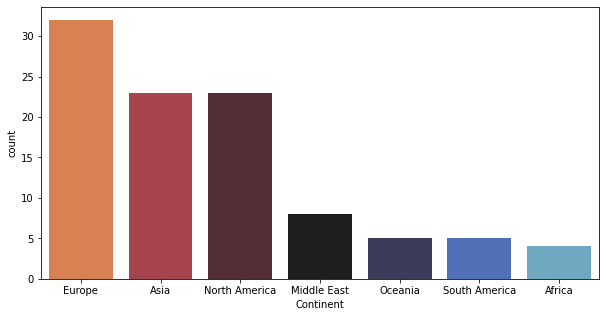

In [9]:
# Lets check for the distribution of continents 
plt.subplots(figsize=(10,5))
sns.countplot(x = 'Continent',data = df,order =df['Continent'].value_counts().index,palette='icefire_r')

The Above plot shows the Distribution of the Continents,which means- Higher the count of countries in the particular continent , higher the measure will be.
Here we see, most of the countries mentioned in our dataset are European countries,following with Asian and so on according to the fig. shown above.

[Text(0, 0, 'U.S.'),
 Text(1, 0, 'China'),
 Text(2, 0, 'U.K.'),
 Text(3, 0, 'India'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Australia'),
 Text(6, 0, 'Canada'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Spain'),
 Text(9, 0, 'Saudi Arabia'),
 Text(10, 0, 'UAE'),
 Text(11, 0, 'Brazil'),
 Text(12, 0, 'Belgium'),
 Text(13, 0, 'Italy'),
 Text(14, 0, 'France'),
 Text(15, 0, 'Netherlands'),
 Text(16, 0, 'South Africa'),
 Text(17, 0, 'Chile'),
 Text(18, 0, 'Indonesia'),
 Text(19, 0, 'Vietnam'),
 Text(20, 0, 'Jordan'),
 Text(21, 0, 'Mexico'),
 Text(22, 0, 'Peru'),
 Text(23, 0, 'Argentina'),
 Text(24, 0, 'Philippines'),
 Text(25, 0, 'Turkey'),
 Text(26, 0, 'Kenya'),
 Text(27, 0, 'Oman'),
 Text(28, 0, 'Qatar'),
 Text(29, 0, 'Taiwan'),
 Text(30, 0, 'Kuwait'),
 Text(31, 0, 'Ireland'),
 Text(32, 0, 'Sweden'),
 Text(33, 0, 'Austria'),
 Text(34, 0, 'South Korea'),
 Text(35, 0, 'Czechia'),
 Text(36, 0, 'Denmark'),
 Text(37, 0, 'New Zealand'),
 Text(38, 0, 'Poland'),
 Text(39, 0, 'Thailand'),
 Text(40, 0, 

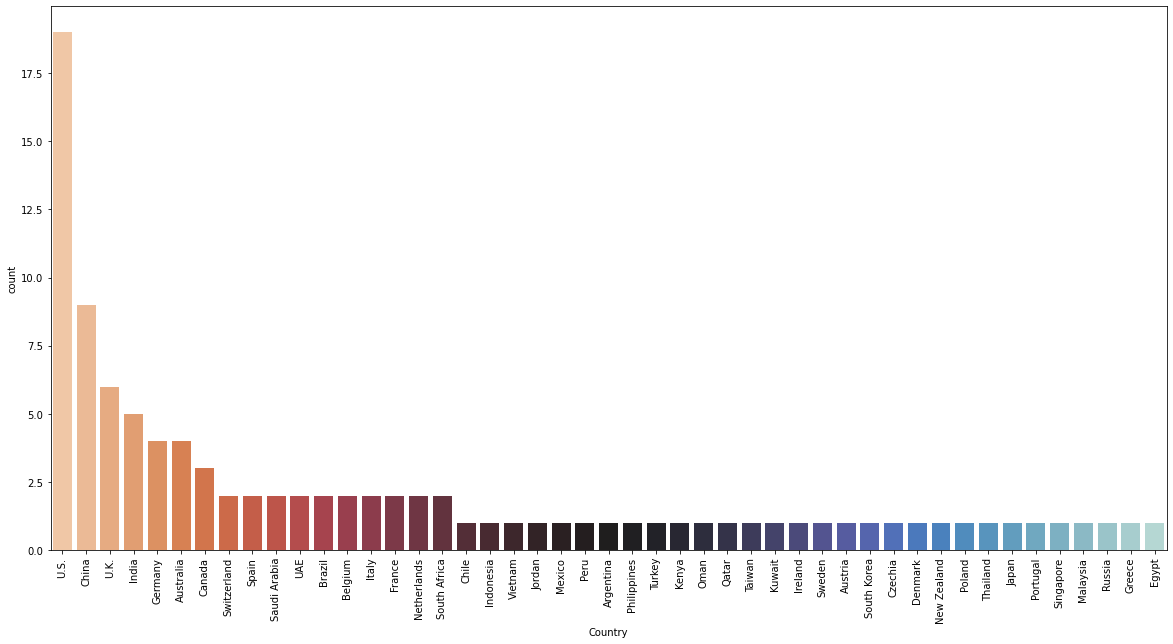

In [10]:
# lets plot the distribution for country.
plt.subplots(figsize=(20,10))
chart = sns.countplot(x='Country',data= df, order = df['Country'].value_counts().index,palette='icefire_r')
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)

In the previous fig. we saw, European countries were at higher count, and in the above fig.we see that Cities from the particular Countries are present.ie; the distribution of Countries are mentioned in the above fig. So we can say that there are more number of cities from U.S, following up with China and so on..

#### Now lets Visualize all the numerical features.

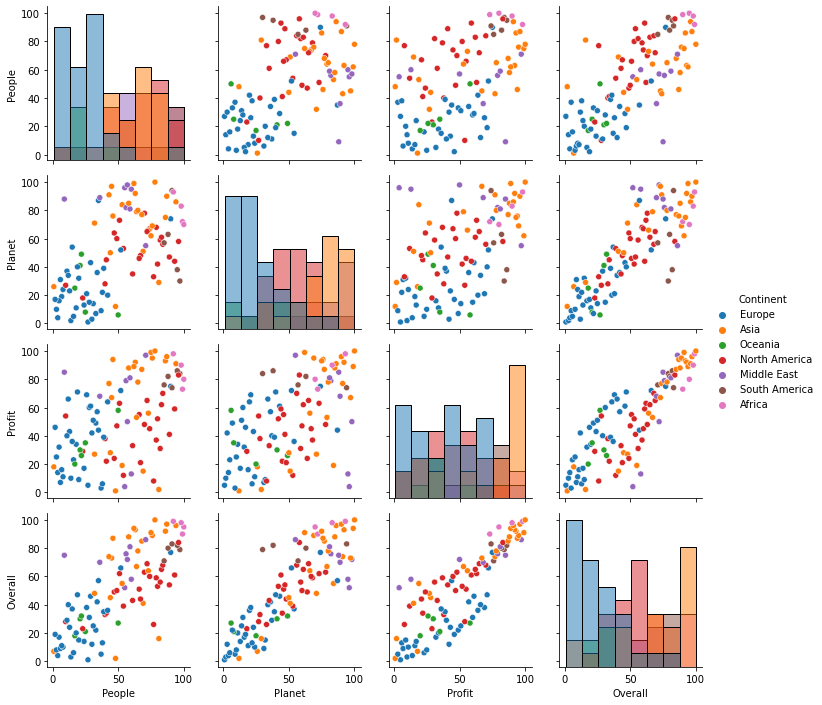

In [11]:
g =sns.PairGrid(df, hue="Continent")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

According to the PairPlot calculated above, We shows the visualization of the count of People,Planet,Profit,and Overall Range with respect to the continent.

Moving on further, we plot the fig to show the overall rank of Indian Cities,where we created the object to store the data referencing the Indian Cities.

In [12]:
india = df[df['Country']=='India']

In [13]:
india.shape

(5, 7)

To get the top overall rank of Indian Cities by plotting the bar graph with its x and y labels as 'city' and 'Overall' respectively. Where we'll do the itertion for every city in 'india' according to the overall rank so that we can get the rank of cities in India with its rank mentioned at the top of each city. So according to the best city definition, when we say that rank is for example. 89 with the city name 'chennai' so it means from India - Chennai is one of the best city.

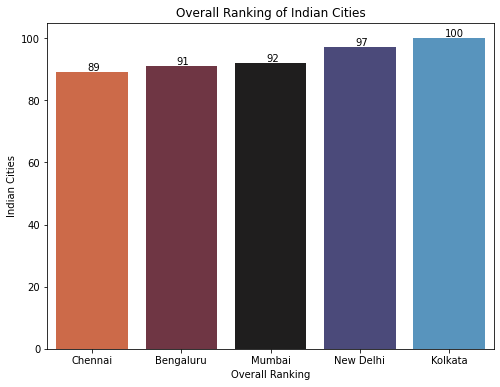

In [14]:
## Top overall ranked Indian Cities:
fig = plt.figure(figsize=(8,6));
ax = fig.add_subplot();
sns.barplot(y='Overall',x='city',data = india,palette='icefire_r');
i=0
for val in india['Overall']:
    ax.text(i-0.05, val+0.5, f'{val}')
    i+=1
plt.xlabel('Overall Ranking');
plt.ylabel('Indian Cities');
plt.title('Overall Ranking of Indian Cities');

In [18]:
def top5_cities(Country):
    top5 = df[df['Country']==Country][:5]
    if top5.shape[0] > 1:
        Country = Country[0].upper() + Country[1:]
        fig = plt.figure(figsize=(8,6));
        ax = fig.add_subplot()
        sns.barplot(x='city',y='Overall',data = top5,palette='icefire_r');
        i=0
        for val in top5['Overall']:
            ax.text(i-0.05, val//2 + 0.25, f'{val}', fontdict = {'size': '15', 'weight' : '3','color':'#ffffff'})
            i+=1
        plt.xlabel(f'{Country} Cities');
        plt.ylabel('Top5 Ranking');
        plt.title(f'Top5 Ranking of {Country} Cities');
        plt.show();

In [19]:
countries = df['Country'].unique()

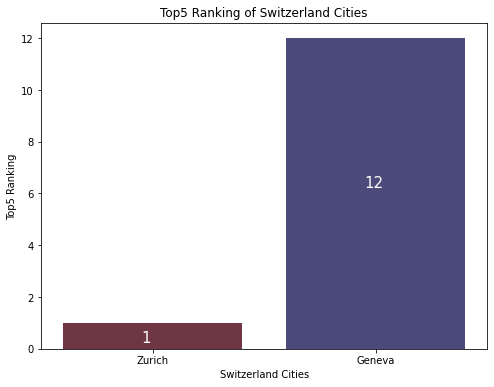

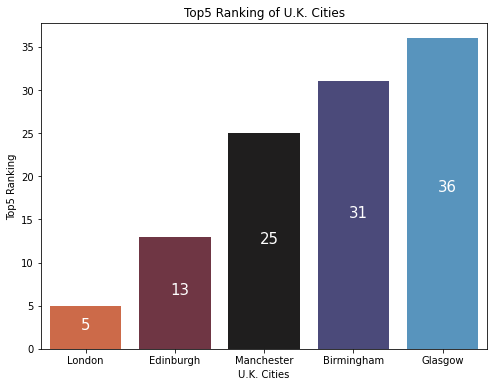

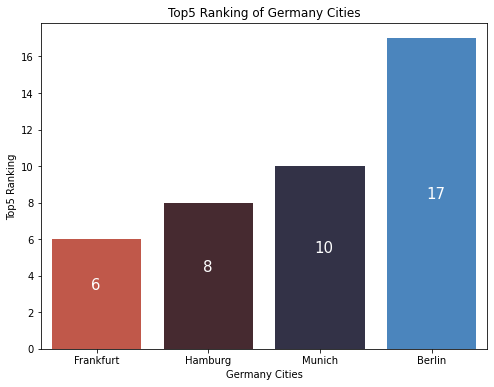

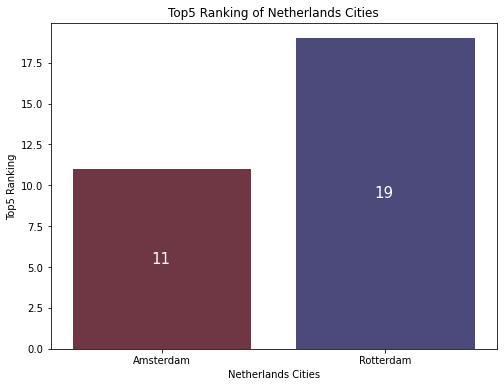

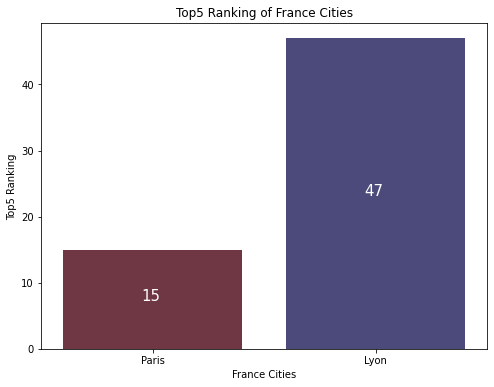

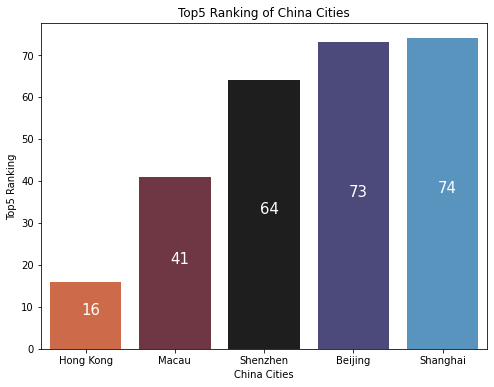

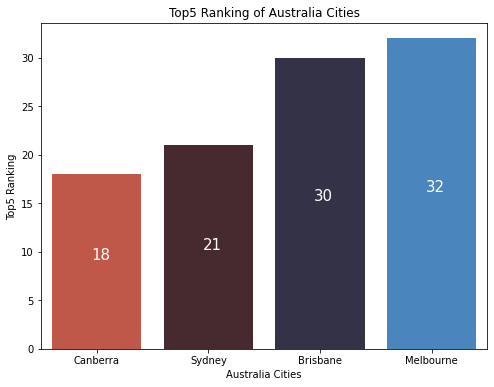

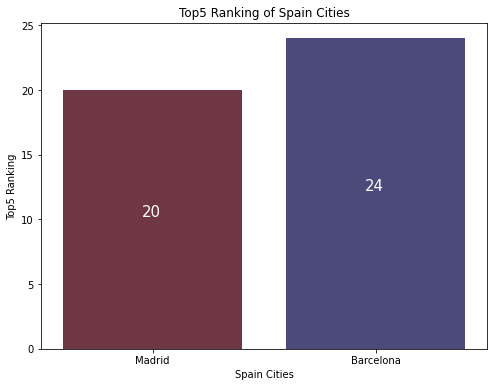

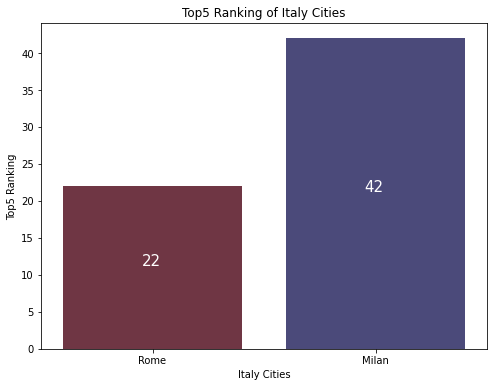

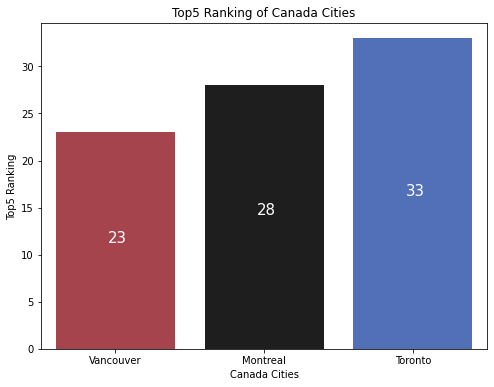

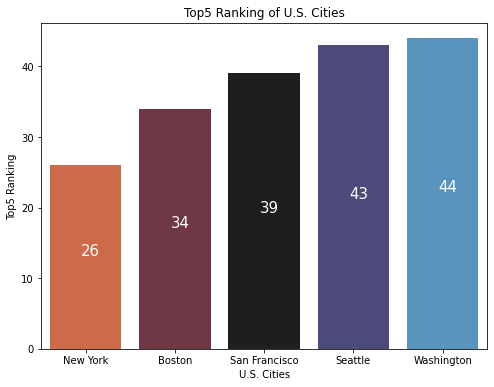

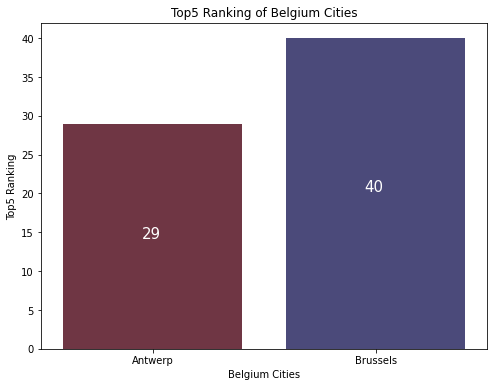

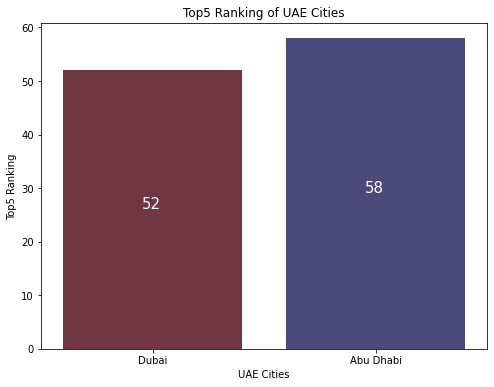

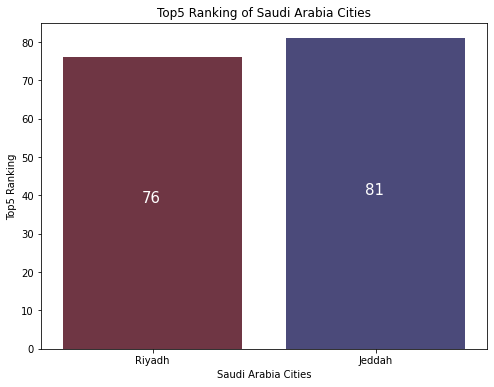

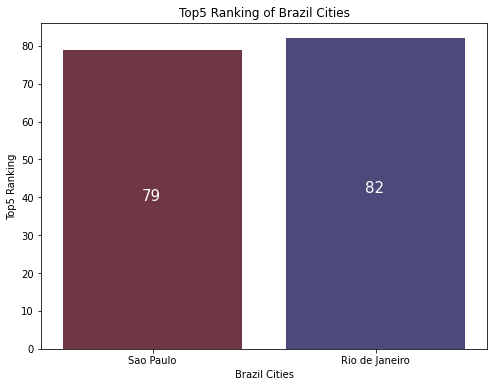

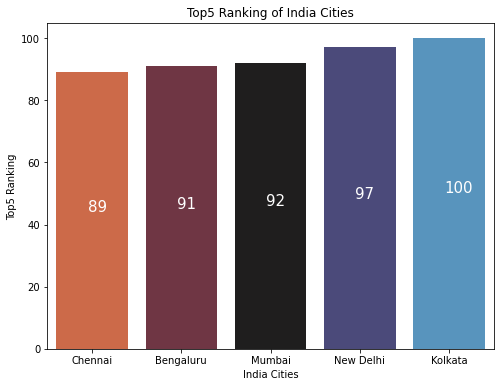

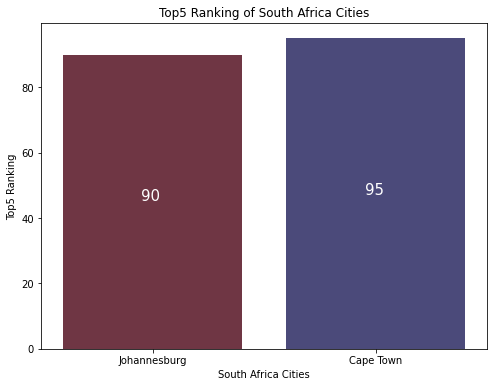

In [20]:
for country in countries:
    top5_cities(country)

So here we get the top 5 cities of each country, where we created a general function named 'top5_cities' with 'Country as a parameter.Because we iterated Every cities from Every Single country present or given in the dataset. So inside the if- statement we then initialized the condition following with its expression, where it went for the next index for the next country and then the process for getting the top 5 rank cities was as similar as we have mentioned for the 'Indian Cities'.With the small change in for loop with it's parameters and the labels of 'x' and 'y'.Later on after calling for our function, we then get the results for top 5 cities rank from each country.

So Here we are done with the Exploratory Data Analysis of the World's Best cities for Planet and People.